# Multiclass Text Classification

The dataset used contains sentences that represent an emotion. The goal is to determine emotions based on sentence text using Natural Language Processing (NLP) model with Tensorflow


# Import Datasets

In [1]:
# Import library
import pandas as pd # data preprocessing
import tensorflow as tf

# data visual
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# NLTK
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# String processing
import re
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
df = pd.read_csv('/content/Emotion_final.csv')
df.head(5)

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


# Preprocessing Data

In [3]:
# Check the number of rows
df.shape

(21459, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


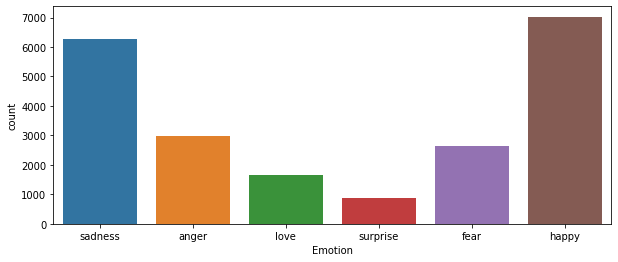

In [5]:
# Visualize the emotion
plt.figure(figsize=(10,4))
sns.countplot(x="Emotion", data=df)

In [6]:
# Check the missing value
df.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [7]:
# Text preprocessing by eliminating stop words and handling non alphanumeric characters
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

def bersih(teks):
    stop_words = stopwords.words("english")
    teks = re.sub(r'http\S+', " ", teks)    # Remove urls
    teks = re.sub(r'@\w+',' ',teks)         # Remove mentions
    teks = re.sub(r'#\w+', ' ', teks)       # Remove hastags
    teks = re.sub('r<.*?>',' ', teks)       # Remove html tags
    
    # Remove stopwords
    teks = teks.split()
    teks = " ".join([word for word in teks if not word in stop_words])

    for punctuation in string.punctuation:
        teks = teks.replace(punctuation, "")
    
    return teks

df['Text'] = df['Text'].apply(lambda x: bersih(x))

In [8]:
df.head(5)

,Text,Emotion
0,didnt feel humiliated,sadness
1,go feeling hopeless damned hopeful around some...,sadness
2,im grabbing minute post feel greedy wrong,anger
3,ever feeling nostalgic fireplace know still pr...,love
4,feeling grouchy,anger


# Encoding The Data 

In [9]:
# Change the categorical label to numeric
category = pd.get_dummies(df.Emotion)
df = pd.concat([df, category], axis=1)
df = df.drop(columns='Emotion')
df

,Text,anger,fear,happy,love,sadness,surprise
0,didnt feel humiliated,0,0,0,0,1,0
1,go feeling hopeless damned hopeful around some...,0,0,0,0,1,0
2,im grabbing minute post feel greedy wrong,1,0,0,0,0,0
3,ever feeling nostalgic fireplace know still pr...,0,0,0,1,0,0
4,feeling grouchy,1,0,0,0,0,0
...,...,...,...,...,...,...,...
21454,Melissa stared friend dism,0,1,0,0,0,0
21455,Successive state elections seen governing part...,0,1,0,0,0,0
21456,Vincent irritated dismay,0,1,0,0,0,0
21457,KendallHume turned back face dismayed coup,0,1,0,0,0,0


In [10]:
# Change dataframe to numpy array data type
teks = df['Text'].values
label = df[['anger', 'fear', 'happy', 'love', 'sadness', 'surprise']].values

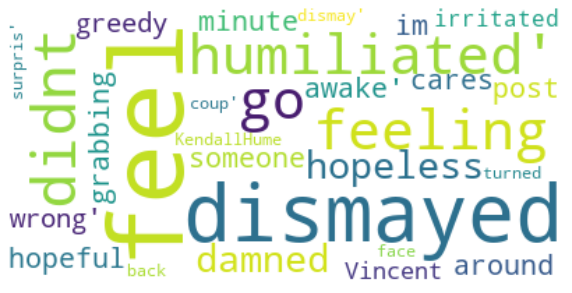

In [11]:
# Visualize the text
wordcloud = WordCloud(background_color="white").generate(str(teks))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
# Splitting data into training and testing data
from sklearn.model_selection import train_test_split
teks_train, teks_test, label_train, label_test = train_test_split(teks, label, test_size=0.2, shuffle=True)

# Using Tokenizer Function

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Convert words to numeric numbers
tokenizer = Tokenizer(num_words=2000, oov_token='x')
tokenizer.fit_on_texts(teks_train)
tokenizer.fit_on_texts(teks_test)

# Create an array containing a collection of tokens according to the words in the sentence
sekuens_train = tokenizer.texts_to_sequences(teks_train)
sekuens_test = tokenizer.texts_to_sequences(teks_test)

# Change the sequence to have the same length
padded_train = pad_sequences(sekuens_train)               
padded_test = pad_sequences(sekuens_test)

# Building Model

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=2000, output_dim=16), # to understand the meaning in each word and group them with similar meanings
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, recurrent_dropout=0.4)), # Long Short-Term Memory
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          32000     
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        41472     
 l)                                                              
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 6)                 3

In [15]:
# The callback is used to have the epoch stop when accuracy is reached
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98):
      print("\nAccuracy has been optimal")
      self.model.stop_training = True
callbacks = myCallback()

# Fitting Model

In [16]:
hist = model.fit(padded_train, label_train,
                 epochs=50,
                 batch_size=16,
                 validation_data=(padded_test, label_test),
                 verbose=2,
                 shuffle=True,
                 callbacks=[callbacks])

Epoch 1/50
1073/1073 - 70s - loss: 1.3076 - accuracy: 0.3903 - val_loss: 1.1038 - val_accuracy: 0.4536 - 70s/epoch - 65ms/step
Epoch 2/50
1073/1073 - 63s - loss: 0.9758 - accuracy: 0.5463 - val_loss: 0.8800 - val_accuracy: 0.6785 - 63s/epoch - 58ms/step
Epoch 3/50
1073/1073 - 63s - loss: 0.6438 - accuracy: 0.8040 - val_loss: 0.5889 - val_accuracy: 0.8341 - 63s/epoch - 59ms/step
Epoch 4/50
1073/1073 - 64s - loss: 0.4881 - accuracy: 0.8550 - val_loss: 0.4937 - val_accuracy: 0.8486 - 64s/epoch - 60ms/step
Epoch 5/50
1073/1073 - 63s - loss: 0.3881 - accuracy: 0.8767 - val_loss: 0.4358 - val_accuracy: 0.8646 - 63s/epoch - 59ms/step
Epoch 6/50
1073/1073 - 63s - loss: 0.3429 - accuracy: 0.8838 - val_loss: 0.3820 - val_accuracy: 0.8670 - 63s/epoch - 59ms/step
Epoch 7/50
1073/1073 - 63s - loss: 0.2970 - accuracy: 0.8977 - val_loss: 0.4068 - val_accuracy: 0.8705 - 63s/epoch - 58ms/step
Epoch 8/50
1073/1073 - 64s - loss: 0.2635 - accuracy: 0.9058 - val_loss: 0.3719 - val_accuracy: 0.8700 - 64s/ep

# Visualize The Model

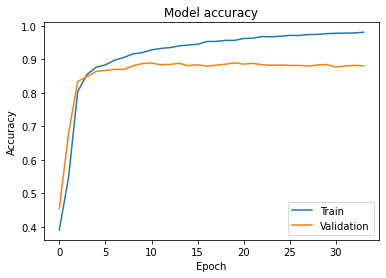

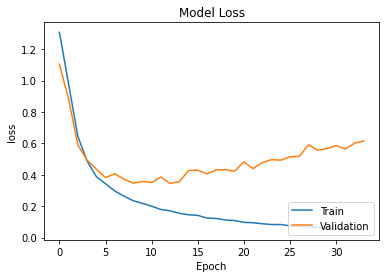

In [17]:
# Plot of Accuracy and Loss
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()